# About this notebook

This notebooke explores some basic facts about the portion of the gridMET dataset we have used in this project.

In [1]:
%matplotlib inline
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pprint import pprint
sns.set_style('darkgrid')
sns.set(font_scale=2)

In [2]:
gridMet_yearly_data = [f for f in os.listdir('.') if re.match(r'gridMet_\d{4}.parquet.gz', f)]
pprint(gridMet_yearly_data)

['gridMet_1999.parquet.gz',
 'gridMet_2000.parquet.gz',
 'gridMet_2001.parquet.gz',
 'gridMet_2002.parquet.gz',
 'gridMet_2003.parquet.gz',
 'gridMet_2004.parquet.gz',
 'gridMet_2005.parquet.gz',
 'gridMet_2006.parquet.gz',
 'gridMet_2007.parquet.gz',
 'gridMet_2008.parquet.gz',
 'gridMet_2009.parquet.gz',
 'gridMet_2010.parquet.gz',
 'gridMet_2011.parquet.gz',
 'gridMet_2012.parquet.gz',
 'gridMet_2013.parquet.gz',
 'gridMet_2014.parquet.gz',
 'gridMet_2015.parquet.gz',
 'gridMet_2016.parquet.gz',
 'gridMet_2017.parquet.gz',
 'gridMet_2018.parquet.gz',
 'gridMet_2019.parquet.gz']


In [3]:
%%time
df = pd.DataFrame()
for file in gridMet_yearly_data:
    df = pd.concat([df, pd.read_parquet(file)])
df['wind_from_direction_radians CCW from east'] = (
    360 - ((df['wind_from_direction_Degrees Clockwise from north'] - 90 + 360) % 360)) * np.pi / 180

df['wind_from_direction_degrees CCW from east'] = df['wind_from_direction_radians CCW from east'] * 180 / np.pi

df['year'] = df.index.get_level_values(0).year
df['month'] = df.index.get_level_values(0).month
df['dayofyear'] = df.index.get_level_values(0).dayofyear + 1
df['year'] = df.index.get_level_values(0).year
print(df.shape)

(10676640, 19)
Wall time: 20.7 s


In [4]:
df.head()

precipitation_amount_mm  \
date       latitude  longitude                              
1999-01-01 33.566667 -117.975000                      0.0   
                     -117.933333                      0.0   
                     -117.891667                      0.0   
                     -117.850000                      0.0   
                     -117.808333                      0.0   

                                  relative_humidity_%  \
date       latitude  longitude                          
1999-01-01 33.566667 -117.975000                 40.3   
                     -117.933333                 39.8   
                     -117.891667                 38.2   
                     -117.850000                 36.4   
                     -117.808333                 33.8   

                                  specific_humidity_kg/kg  \
date       latitude  longitude                              
1999-01-01 33.566667 -117.975000                  0.00589   
                     -117.933333                  0.00590   
                     -117.891667                  0.00580   
                     -117.850000                  0.00567   
                     -117.808333                  0.00538   

                                  surface_downwelling_shortwave_flux_in_air_W m-2  \
date       latitude  longitude                                                      
1999-01-01 33.566667 -117.975000                                            138.0   
                     -117.933333                                            137.2   
                     -117.891667                                            137.2   
                     -117.850000                                            137.3   
                     -117.808333                                            137.3   

                                  wind_from_direction_Degrees Clockwise from north  \
date       latitude  longitude                                                       
1999-01-01 33.566667 -117.975000                                             123.0   
                     -117.933333                                             123.0   
                     -117.891667                                             123.0   
                     -117.850000                                              49.0   
                     -117.808333                                              49.0   

                                  wind_speed_m/s  max_air_temperature_K  \
date       latitude  longitude                                            
1999-01-01 33.566667 -117.975000             1.6                  293.1   
                     -117.933333             1.6                  293.1   
                     -117.891667             1.7                  293.2   
                     -117.850000             1.8                  293.3   
                     -117.808333             1.9                  293.2   

                                  min_air_temperature_K  \
date       latitude  longitude                            
1999-01-01 33.566667 -117.975000                  281.1   
                     -117.933333                  281.2   
                     -117.891667                  281.2   
                     -117.850000                  280.3   
                     -117.808333                  279.9   

                                  burning_index_g_Unitless  \
date       latitude  longitude                               
1999-01-01 33.566667 -117.975000                      24.0   
                     -117.933333                      24.0   
                     -117.891667                      26.0   
                     -117.850000                      27.0   
                     -117.808333                      29.0   

                                  dead_fuel_moisture_100hr_Percent  \
date       latitude  longitude                                       
1999-01-01 33.566667 -117.975000                              16

In [5]:
tmp = df.groupby(by=['latitude', 'longitude']).count().reset_index()
print(tmp.shape)
tmp

(1392, 21)


,latitude,longitude,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,...,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,wind_from_direction_radians CCW from east,wind_from_direction_degrees CCW from east,year,month,dayofyear
0,32.400000,-117.975000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7670,7670,7670
1,32.400000,-117.933333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7670,7670,7670
2,32.400000,-117.891667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7670,7670,7670
3,32.400000,-117.850000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7670,7670,7670
4,32.400000,-117.808333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7670,7670,7670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,33.566667,-116.183333,7670,7670,7670,7670,7670,7670,7670,7670,...,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670
1388,33.566667,-116.141667,7670,7670,7670,7670,7670,7670,7670,7670,...,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670
1389,33.566667,-116.100000,7670,7670,7670,7670,7670,7670,7670,7670,...,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670
1390,33.566667,-116.058333,7670,7670,7670,7670,7670,7670,7670,7670,...,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670


In [6]:
print("Number of grid areas:", tmp[tmp.precipitation_amount_mm > 0].shape[0])

Number of grid areas: 890


In [7]:
df.describe()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,wind_from_direction_radians CCW from east,wind_from_direction_degrees CCW from east,year,month,dayofyear
count,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,6.826300e+06,1.067664e+07,1.067664e+07,1.067664e+07
mean,8.304122e-01,3.000426e+01,6.503330e-03,2.385361e+02,2.266884e+02,2.980093e+00,2.976084e+02,2.834156e+02,3.714322e+01,1.201792e+01,1.275536e+01,5.026444e+01,4.325072e+00,1.354994e+00,3.357213e+00,1.923542e+02,2.008999e+03,6.523077e+00,1.841193e+02
std,4.286879e+00,1.769667e+01,2.908315e-03,7.989067e+01,7.785217e+01,1.255808e+00,7.771557e+00,6.103147e+00,1.910992e+01,4.536604e+00,4.035236e+00,2.096610e+01,1.928999e+00,9.730105e-01,1.203796e+00,6.897240e+01,6.055104e+00,3.448663e+00,1.054352e+02
min,0.000000e+00,1.000000e-01,2.400000e-04,4.500000e+00,0.000000e+00,4.000000e-01,2.686000e+02,2.575000e+02,0.000000e+00,1.900000e+00,3.400000e+00,0.000000e+00,2.000000e-01,0.000000e+00,1.745329e-02,1.000000e+00,1.999000e+03,1.000000e+00,2.000000e+00
25%,0.000000e+00,1.540000e+01,4.310000e-03,1.649000e+02,1.970000e+02,2.200000e+00,2.921000e+02,2.791000e+02,2.700000e+01,8.100000e+00,9.600000e+00,3.400000e+01,2.700000e+00,6.300000e-01,2.705260e+00,1.550000e+02,2.004000e+03,4.000000e+00,9.300000e+01
50%,0.000000e+00,2.670000e+01,6.200000e-03,2.456000e+02,2.410000e+02,2.700000e+00,2.970000e+02,2.833000e+02,3.700000e+01,1.210000e+01,1.290000e+01,4.700000e+01,4.200000e+00,1.090000e+00,3.438299e+00,1.970000e+02,2.009000e+03,7.000000e+00,1.840000e+02
75%,0.000000e+00,4.260000e+01,8.430000e-03,3.129000e+02,2.770000e+02,3.500000e+00,3.031000e+02,2.879000e+02,5.000000e+01,1.540000e+01,1.560000e+01,6.600000e+01,5.700000e+00,1.830000e+00,4.101524e+00,2.350000e+02,2.014000e+03,1.000000e+01,2.750000e+02
max,2.871000e+02,1.000000e+02,2.392000e-02,3.777000e+02,3.600000e+02,1.620000e+01,3.227000e+02,3.074000e+02,1.510000e+02,3.060000e+01,3.080000e+01,1.100000e+02,1.320000e+01,7.170000e+00,6.283185e+00,3.600000e+02,2.019000e+03,1.200000e+01,3.670000e+02


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10676640 entries, (Timestamp('1999-01-01 00:00:00'), 33.56666666666667, -117.97499996666667) to (Timestamp('2019-12-31 00:00:00'), 32.400000000000006, -116.01666663333334)
Data columns (total 19 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   precipitation_amount_mm                           float64
 1   relative_humidity_%                               float64
 2   specific_humidity_kg/kg                           float64
 3   surface_downwelling_shortwave_flux_in_air_W m-2   float64
 4   wind_from_direction_Degrees Clockwise from north  float64
 5   wind_speed_m/s                                    float64
 6   max_air_temperature_K                             float64
 7   min_air_temperature_K                             float64
 8   burning_index_g_Unitless                          float64
 9   dead_fuel_moisture_100hr_Percent               

In [9]:
print("Percent of entries that are NULL per column")
np.sum(df.isna()) / (df.count() + np.sum(df.isna())) * 100

Percent of entries that are NULL per column


precipitation_amount_mm                             36.063218
relative_humidity_%                                 36.063218
specific_humidity_kg/kg                             36.063218
surface_downwelling_shortwave_flux_in_air_W m-2     36.063218
wind_from_direction_Degrees Clockwise from north    36.063218
wind_speed_m/s                                      36.063218
max_air_temperature_K                               36.063218
min_air_temperature_K                               36.063218
burning_index_g_Unitless                            36.063218
dead_fuel_moisture_100hr_Percent                    36.063218
dead_fuel_moisture_1000hr_Percent                   36.063218
energy_release_component-g_Unitless                 36.063218
potential_evapotranspiration_mm                     36.063218
mean_vapor_pressure_deficit_kPa                     36.063218
wind_from_direction_radians CCW from east           36.063218
wind_from_direction_degrees CCW from east           36.063218
year    

In [10]:
print("Total non-NULL rows per column")
df.count()

Total non-NULL rows per column


precipitation_amount_mm                              6826300
relative_humidity_%                                  6826300
specific_humidity_kg/kg                              6826300
surface_downwelling_shortwave_flux_in_air_W m-2      6826300
wind_from_direction_Degrees Clockwise from north     6826300
wind_speed_m/s                                       6826300
max_air_temperature_K                                6826300
min_air_temperature_K                                6826300
burning_index_g_Unitless                             6826300
dead_fuel_moisture_100hr_Percent                     6826300
dead_fuel_moisture_1000hr_Percent                    6826300
energy_release_component-g_Unitless                  6826300
potential_evapotranspiration_mm                      6826300
mean_vapor_pressure_deficit_kPa                      6826300
wind_from_direction_radians CCW from east            6826300
wind_from_direction_degrees CCW from east            6826300
year                    

C:\Users\Mike\AppData\Local\Continuum\anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


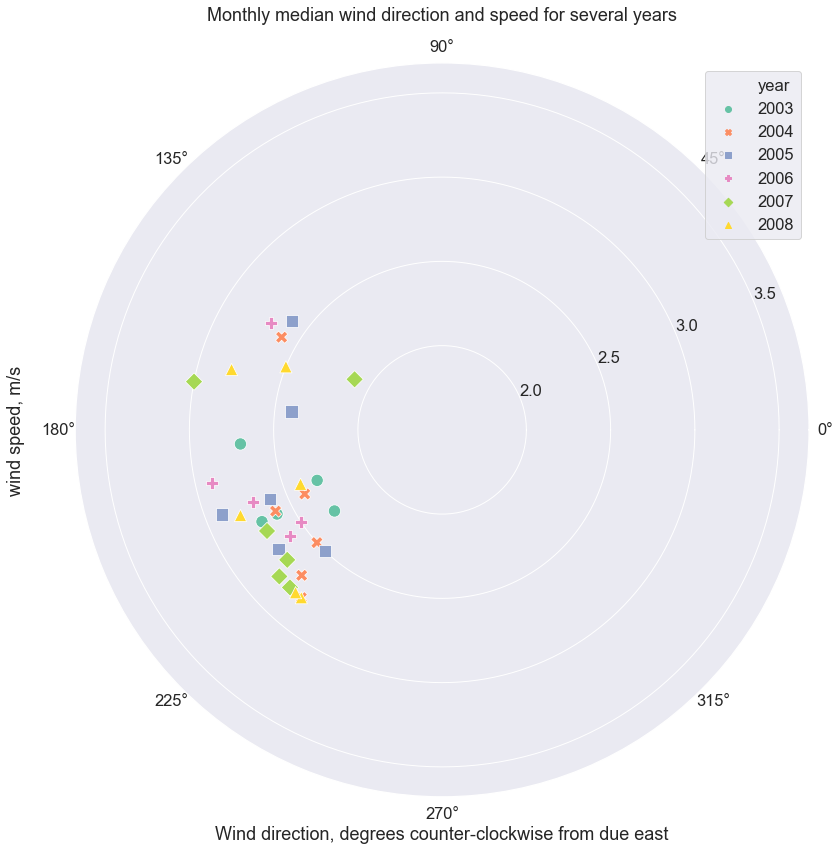

In [34]:
from matplotlib.lines import Line2D

years = range(2003, 2009)
mask = df.year.isin(years) & df.month.isin(range(6, 12))
markers = Line2D.filled_markers

median_wind_direction = df[mask].groupby(by=['year', 'month'])\
    ['wind_from_direction_radians CCW from east', 'wind_from_direction_degrees CCW from east', 'wind_speed_m/s'].median()

median_wind_direction.reset_index(inplace=True)

# Set up a grid of axes with a polar projection
ax = plt.subplot(111, projection='polar')

plt.gcf().set_figwidth(24)
plt.gcf().set_figheight(13.5)

sns.set(font_scale=1.5)

sns.scatterplot(data=median_wind_direction,
                ax=ax,
                style='year',
                hue='year',
                vmin=2,
                palette=sns.color_palette("Set2", n_colors=len(years)),
                s=150,
                x="wind_from_direction_radians CCW from east",
                y="wind_speed_m/s");

ax.set_rorigin(1.5)
ax.set_title("Monthly median wind direction and speed for several years")
ax.set_ylabel('wind speed, m/s', labelpad=50);
ax.set_xlabel('Wind direction, degrees counter-clockwise from due east');

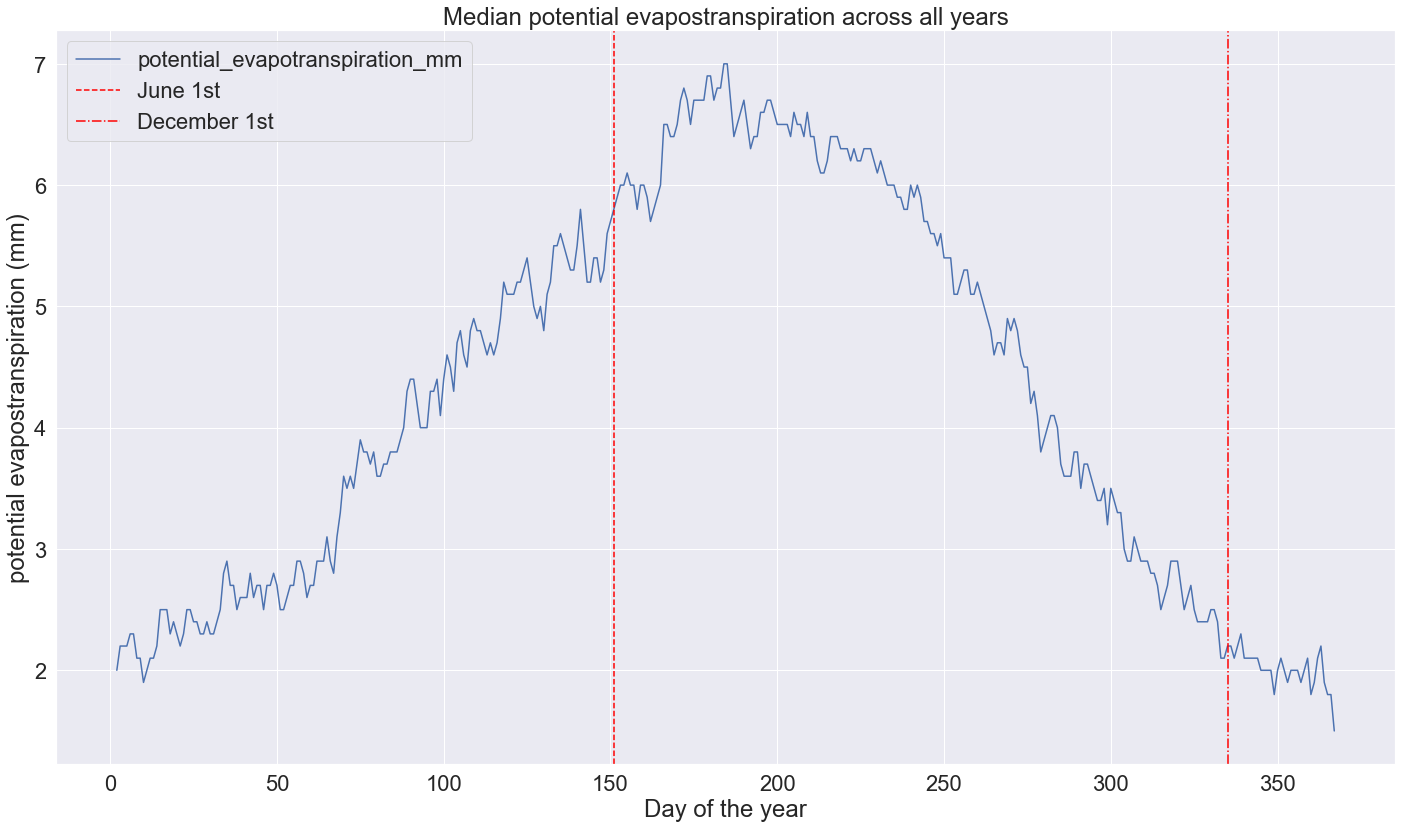

In [29]:
sns.set(font_scale=2)
df['dayofyear'] = df.index.get_level_values(0).dayofyear + 1
median_evptr = df.groupby(by=['dayofyear'])['potential_evapotranspiration_mm'].median()
ax = median_evptr.plot(figsize=(24, 13.5));
ax.axvline(151, color='red', linestyle='--', label='June 1st')
ax.axvline(335, color='red', linestyle='-.', label='December 1st')
plt.legend()
ax.set_title("Median potential evapostranspiration across all years");
ax.set_ylabel("potential evapostranspiration (mm)");
ax.set_xlabel("Day of the year");

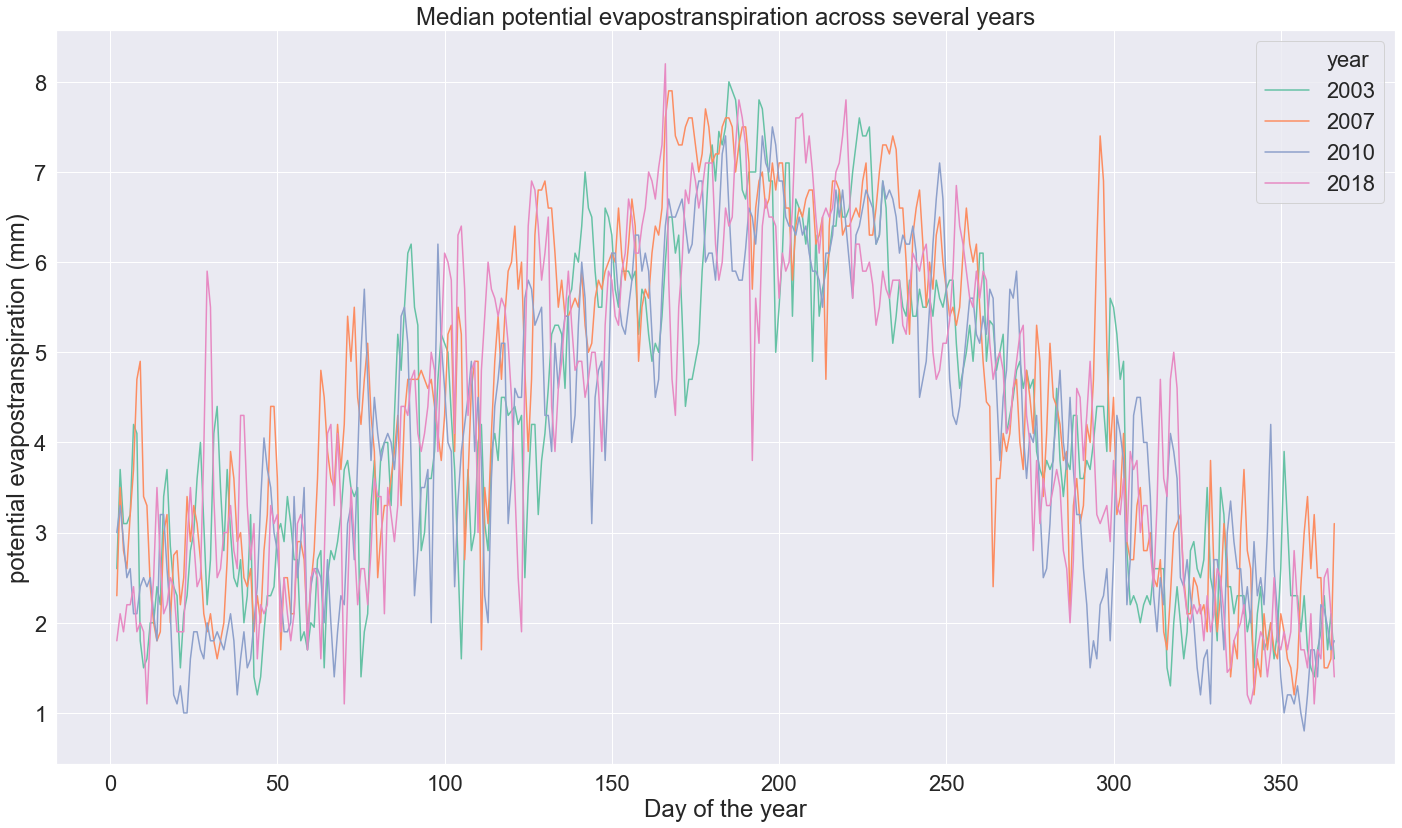

In [30]:
sns.set(font_scale=2)

years = [2003, 2007, 2010, 2018]
mask = df.year.isin(years)

median_evptr = df[mask].groupby(by=['dayofyear', 'year'])['potential_evapotranspiration_mm'].median().reset_index()

# display(median_evptr.year)
# median_evptr.year = median_evptr.year.astype(str)
# display(median_evptr.year)

plt.gcf().set_figwidth(24)
plt.gcf().set_figheight(13.5)

ax = sns.lineplot(data=median_evptr,
                     x='dayofyear',
                     y='potential_evapotranspiration_mm',
                     palette=sns.color_palette("Set2", n_colors=len(years)),
                     hue='year');
ax.set_title("Median potential evapostranspiration across several years");
ax.set_ylabel("potential evapostranspiration (mm)");
ax.set_xlabel("Day of the year");

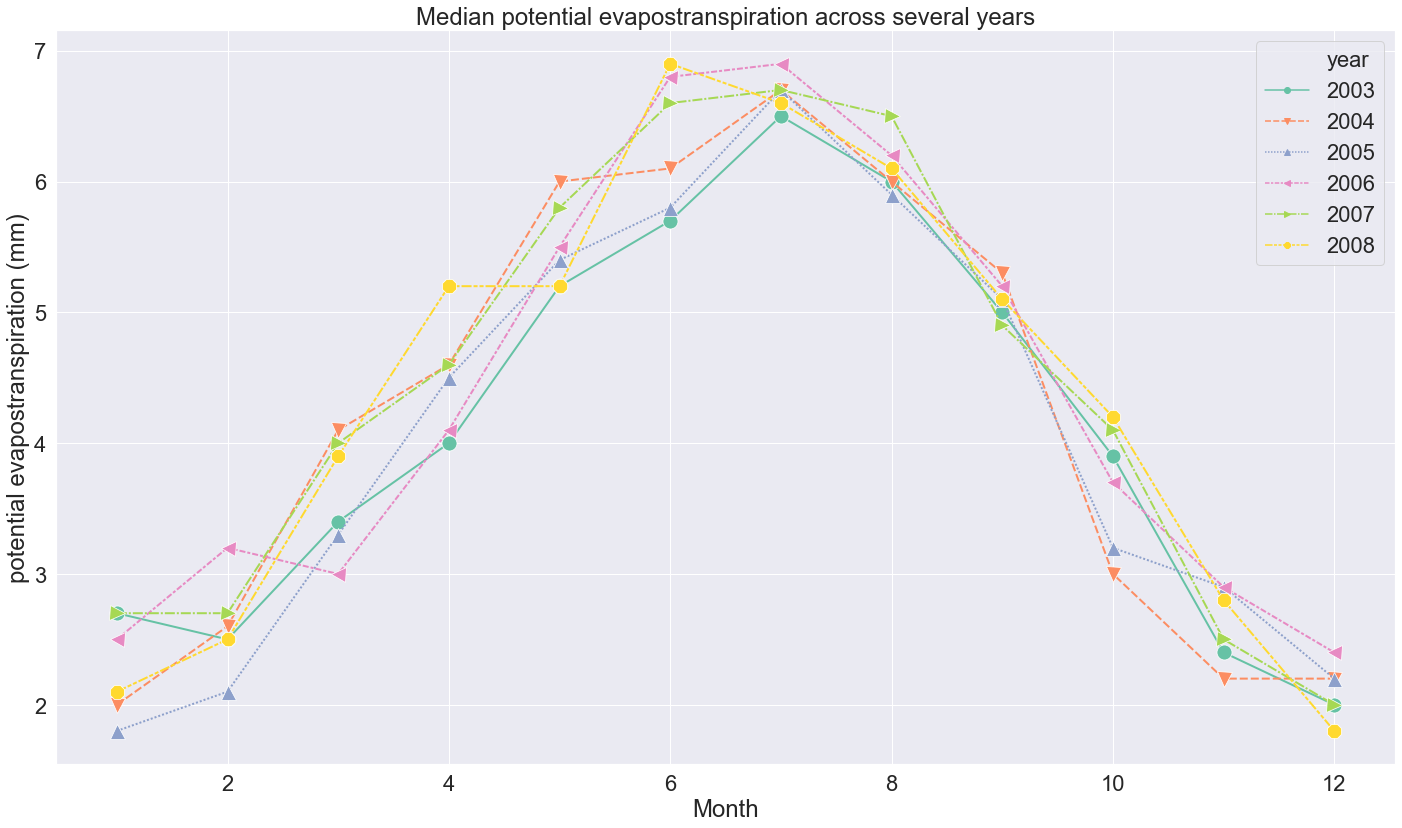

In [31]:
sns.set(font_scale=2)

years = range(2003, 2009)
mask = df.year.isin(years)
markers = Line2D.filled_markers

median_evptr = df[mask].groupby(by=['month', 'year'])['potential_evapotranspiration_mm'].median().reset_index()

plt.gcf().set_figwidth(24)
plt.gcf().set_figheight(13.5)

ax = sns.lineplot(data=median_evptr,
                     x='month',
                     y='potential_evapotranspiration_mm',
                     palette=sns.color_palette("Set2", n_colors=len(years)),
                     linewidth=2,
                     markersize=15,
                     style='year',
                     markers=markers,
                     hue='year');
ax.set_title("Median potential evapostranspiration across several years");
ax.set_ylabel("potential evapostranspiration (mm)");
ax.set_xlabel("Month");

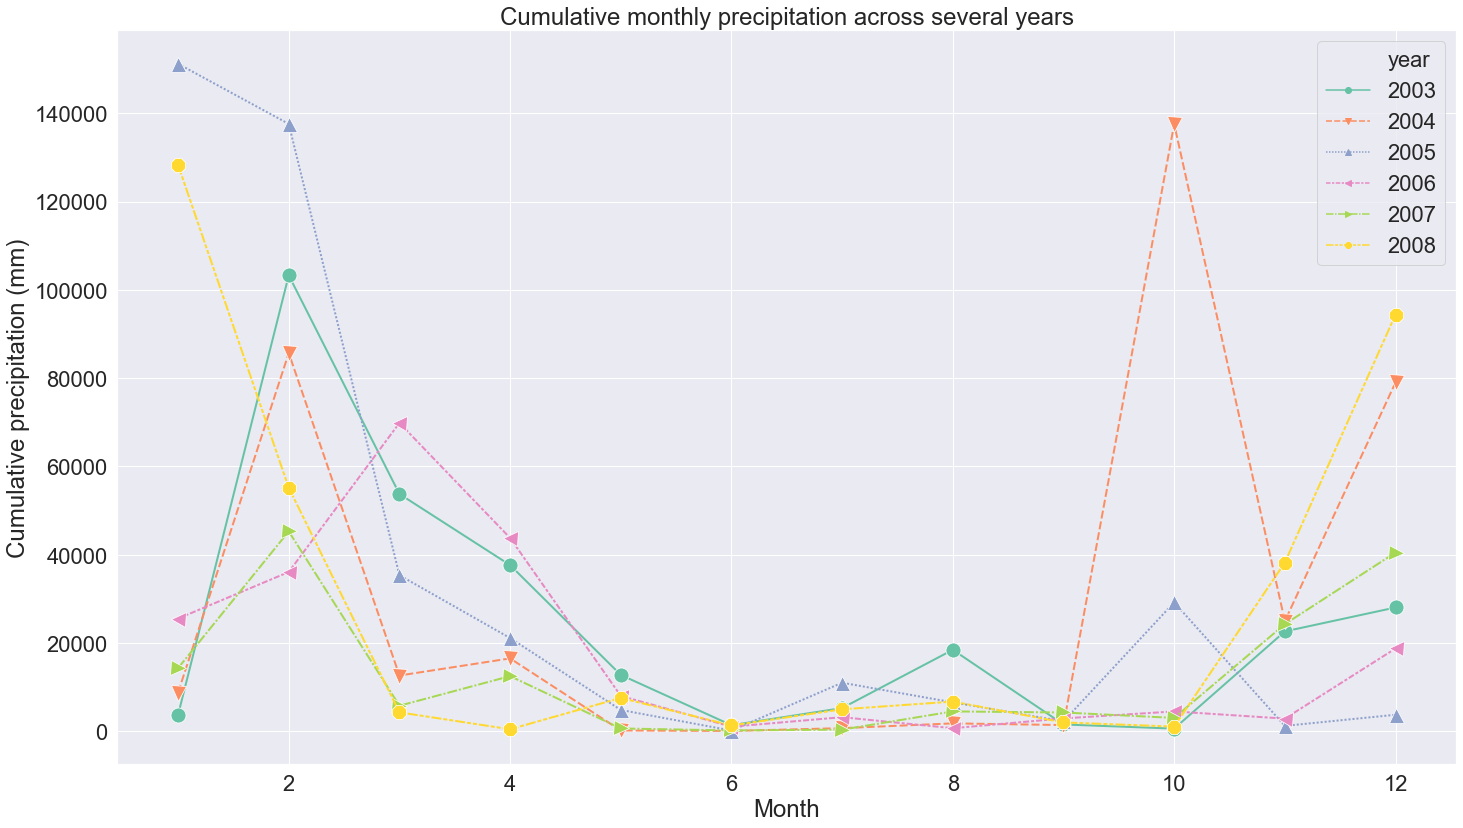

In [37]:
sns.set(font_scale=2)

years = range(2003, 2009)
mask = df.year.isin(years)
markers = Line2D.filled_markers

median_evptr = df[mask].groupby(by=['month', 'year'])['precipitation_amount_mm'].sum().reset_index()

plt.gcf().set_figwidth(24)
plt.gcf().set_figheight(13.5)

ax = sns.lineplot(data=median_evptr,
                     x='month',
                     y='precipitation_amount_mm',
                     palette=sns.color_palette("Set2", n_colors=len(years)),
                     linewidth=2,
                     markersize=15,
                     style='year',
                     markers=markers,
                     hue='year');
ax.set_title("Cumulative monthly precipitation across several years");
ax.set_ylabel("Cumulative precipitation (mm)");
ax.set_xlabel("Month");